In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielensdata/users.dat
/kaggle/input/movielensdata/ratings.dat
/kaggle/input/movielensdata/movies.dat
/kaggle/input/datasetprocessed/ratings.csv
/kaggle/input/datasetprocessed/movies.csv
/kaggle/input/datasetprocessed/users.csv


In [2]:
user_data = '/kaggle/input/movielensdata/users.dat'
movie_data = '/kaggle/input/movielensdata/movies.dat'
ratings_data = '/kaggle/input/movielensdata/ratings.dat'

In [3]:
data=pd.read_csv(ratings_data)
data

,1::1193::5::978300760
0,1::661::3::978302109
1,1::914::3::978301968
2,1::3408::4::978300275
3,1::2355::5::978824291
4,1::1197::3::978302268
...,...
1000203,6040::1091::1::956716541
1000204,6040::1094::5::956704887
1000205,6040::562::5::956704746
1000206,6040::1096::4::956715648


We have to convert these files to csv..

In [4]:
# Define csv files to be saved into
users_csv = 'users.csv'
movies_csv = 'movies.csv'
ratings_csv = 'ratings.csv'

# Changing to CSV-->

In [5]:
# Read the Ratings File
ratings = pd.read_csv(os.path.join(ratings_data), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['User_ID', 'Movie_ID', 'Rating', 'Timestamp'])

max_userid = ratings['User_ID'].drop_duplicates().max()

max_movieid = ratings['Movie_ID'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['User_emb_ID'] = ratings['User_ID'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['Movie_emb_ID'] = ratings['Movie_ID'] - 1

print("Total Ratings",len(ratings),"readed")

Total Ratings 1000209 readed


In [6]:
ratings

,User_ID,Movie_ID,Rating,Timestamp,User_emb_ID,Movie_emb_ID
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,6039,1090
1000205,6040,1094,5,956704887,6039,1093
1000206,6040,562,5,956704746,6039,561
1000207,6040,1096,4,956715648,6039,1095


# Saving to CSV File-->

In [7]:
# ratings.to_csv(ratings_csv, 
#                sep='\t', 
#                header=True, 
#                encoding='latin-1', 
#                columns=['User_ID', 'Movie_ID', 'Rating', 'Timestamp', 'User_emb_ID', 'Movie_emb_ID'])

# print('Saved as', ratings_csv)

In [8]:
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }

# Changing to CSV-->

In [9]:
data=pd.read_csv(user_data)
data

,1::F::1::10::48067
0,2::M::56::16::70072
1,3::M::25::15::55117
2,4::M::45::7::02460
3,5::M::25::20::55455
4,6::F::50::9::55117
...,...
6034,6036::F::25::15::32603
6035,6037::F::45::1::76006
6036,6038::F::56::1::14706
6037,6039::F::45::0::01060


In [10]:
users = pd.read_csv(os.path.join(user_data), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['User_ID', 'Gender', 'Age', 'Occupation', 'Zipcode'])
users['Age_desc'] = users['Age'].apply(lambda x: AGES[x])
print(len(users), 'Descriptions of', max_userid, 'Users readed.')

6040 Descriptions of 6040 Users readed.


In [11]:
users

,User_ID,Gender,Age,Occupation,Zipcode,Age_desc
0,1,F,1,10,48067,Under 18
1,2,M,56,16,70072,56+
2,3,M,25,15,55117,25-34
3,4,M,45,7,02460,45-49
4,5,M,25,20,55455,25-34
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,25-34
6036,6037,F,45,1,76006,45-49
6037,6038,F,56,1,14706,56+
6038,6039,F,45,0,01060,45-49


# Saving to CSV

In [12]:
# users.to_csv(users_csv, 
#              sep='\t', 
#              header=True, 
#              encoding='latin-1',
#              columns=['User_ID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'Age_desc'])
# print('Saved to', users_csv)

In [13]:
movies = pd.read_csv(os.path.join(movie_data), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['Movie_id', 'Title', 'Genres'])
print(len(movies), 'Descriptions of', max_movieid, 'movies readed.')

3883 Descriptions of 3952 movies readed.


In [14]:
movies

,Movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# Saving to CSV

In [15]:
# movies.to_csv(movies_csv, 
#               sep='\t', 
#               header=True, 
#               columns=['Movie_id', 'Title', 'Genres'])
# print('Saved to', movies_csv)

# Now importing the converted CSV files..-->

In [16]:
ratings = pd.read_csv('/kaggle/input/datasetprocessed/ratings.csv', sep='\t', encoding='latin-1', usecols=['User_ID', 'Movie_ID', 'Rating'])

# Reading users file
users = pd.read_csv('/kaggle/input/datasetprocessed/users.csv', sep='\t', encoding='latin-1', usecols=['User_ID', 'Gender', 'Zipcode', 'Age_desc'])

# Reading movies file
movies = pd.read_csv('/kaggle/input/datasetprocessed/movies.csv', sep='\t', encoding='latin-1', usecols=['Movie_id', 'Title', 'Genres'])

In [17]:
ratings.head()

,User_ID,Movie_ID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   User_ID   1000209 non-null  int64
 1   Movie_ID  1000209 non-null  int64
 2   Rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [19]:
users.head()

,User_ID,Gender,Zipcode,Age_desc
0,1,F,48067,Under 18
1,2,M,70072,56+
2,3,M,55117,25-34
3,4,M,02460,45-49
4,5,M,55455,25-34


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_ID   6040 non-null   int64 
 1   Gender    6040 non-null   object
 2   Zipcode   6040 non-null   object
 3   Age_desc  6040 non-null   object
dtypes: int64(1), object(3)
memory usage: 188.9+ KB


In [21]:
movies.head()

,Movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


# Movie Recommendation with Content-Based and Collaborative Filtering

“What movie should I watch this evening?” 

Have you ever had to answer this question at least once when you came home from work? As for me — yes, and more than once. From Netflix to Hulu, the need to build robust movie recommendation systems is extremely important given the huge demand for personalized content of modern consumers.

An example of recommendation system is such as this:

User A watches Game of Thrones and Breaking Bad.
User B does search on Game of Thrones, then the system suggests Breaking Bad from data collected about user A.
Recommendation systems are used not only for movies, but on multiple other products and services like Amazon (Books, Items), Pandora/Spotify (Music), Google (News, Search), YouTube (Videos) etc.

In [23]:
ratings.isnull().sum()

User_ID     0
Movie_ID    0
Rating      0
dtype: int64

In [24]:
users.isnull().sum()

User_ID     0
Gender      0
Zipcode     0
Age_desc    0
dtype: int64

In [25]:
movies.isnull().sum()

Movie_id    0
Title       0
Genres      0
dtype: int64

# Data Exploration-->

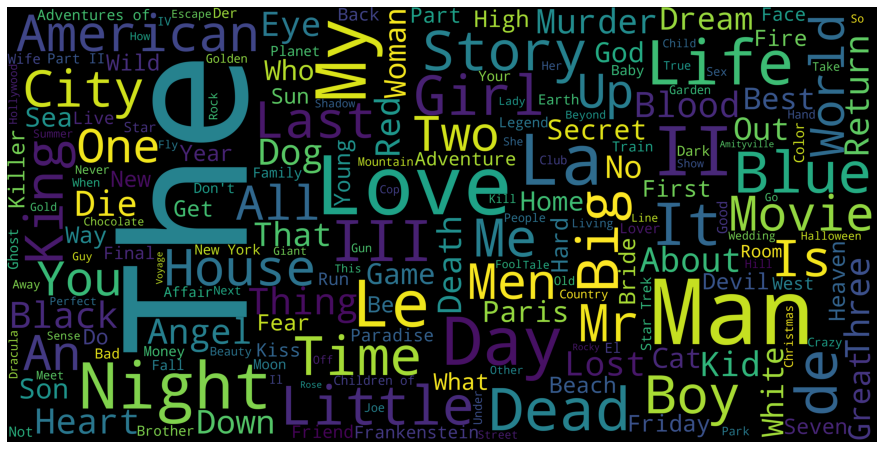

In [26]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['Title'] = movies['Title'].fillna("").astype('str')
title_corpus = ' '.join(movies['Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [27]:
movies['Movie_ID']=movies['Movie_id']

In [28]:
movies.drop('Movie_id',axis=1,inplace=True)

In [29]:
movies

,Title,Genres,Movie_ID
0,Toy Story (1995),Animation|Children's|Comedy,1
1,Jumanji (1995),Adventure|Children's|Fantasy,2
2,Grumpier Old Men (1995),Comedy|Romance,3
3,Waiting to Exhale (1995),Comedy|Drama,4
4,Father of the Bride Part II (1995),Comedy,5
...,...,...,...
3878,Meet the Parents (2000),Comedy,3948
3879,Requiem for a Dream (2000),Drama,3949
3880,Tigerland (2000),Drama,3950
3881,Two Family House (2000),Drama,3951


# Merging the three datasets-->

In [32]:
dataset = pd.merge(pd.merge(movies, ratings),users)
dataset

,Title,Genres,Movie_ID,User_ID,Rating,Gender,Zipcode,Age_desc
0,Toy Story (1995),Animation|Children's|Comedy,1,1,5,F,48067,Under 18
1,Pocahontas (1995),Animation|Children's|Musical|Romance,48,1,5,F,48067,Under 18
2,Apollo 13 (1995),Drama,150,1,5,F,48067,Under 18
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,260,1,4,F,48067,Under 18
4,Schindler's List (1993),Drama|War,527,1,5,F,48067,Under 18
...,...,...,...,...,...,...,...,...
1000204,Rules of Engagement (2000),Drama|Thriller,3513,5727,4,M,92843,25-34
1000205,American Psycho (2000),Comedy|Horror|Thriller,3535,5727,2,M,92843,25-34
1000206,Keeping the Faith (2000),Comedy|Romance,3536,5727,5,M,92843,25-34
1000207,U-571 (2000),Action|Thriller,3555,5727,3,M,92843,25-34


# Top 10 Movies on the basis of Ratings-->

In [31]:
dataset[['Title','Age_desc','Genres','Rating']].sort_values('Rating', ascending=False).head(10)

KeyError: "['Age'] not in index"

In [ ]:
title_corpus = ' '.join(dataset['Genres'])
title_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# 1. Content-Based Recommendation System

In [ ]:
dataset['Genres'] = dataset['Genres'].str.split('|')
dataset['Genres'] = dataset['Genres'].fillna("").astype('str')

In [ ]:
dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dataset['Genres'])
tfidf_matrix.shape

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

In [ ]:
titles = dataset['Title']
indices = pd.Series(movies.index, index=dataset['Title'])

def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]